In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
f = open('data.txt','r')
n = int(f.readline())
input_data = np.zeros((n,2))
h = np.zeros(n+5)
d = np.zeros(n+5)
multi_dim_array = np.zeros((n-1,n))
for i in range(n):
    st = f.readline()
    string = st.split()
    input_data[i][0] = float(string[0])
    input_data[i][1] = float(string[1])
input_data = input_data[input_data[:,0].argsort()]
# print(input_data)

In [25]:
def calculate_h(input_data,h,n):
    for i in range(1,n):
        h[i] = input_data[i][0] -  input_data[i-1][0]

In [26]:
def calculate_d(input_data,h,d,n):
    for i in range(1,n-1):
        f1 = (input_data[i+1][1] - input_data[i][1])/h[i+1]
        f2 = (input_data[i][1] - input_data[i-1][1])/h[i]
        d[i] = 6*(f1 - f2)

In [27]:
calculate_h(input_data,h,n)
calculate_d(input_data,h,d,n)
# print(h)
# print(d)

In [28]:
def calculate_matrix(multi_dim_array,h,d,n):
    for i in range(1,n-1):
        if i == 1:
            multi_dim_array[i][i] = 2*(h[i] + h[i+1])
            multi_dim_array[i][i+1] = h[i+1]
        elif i == n-2:
            multi_dim_array[i][i-1] = h[i]
            multi_dim_array[i][i] = 2*(h[i] + h[i+1])
        else:
            multi_dim_array[i][i-1] = h[i]
            multi_dim_array[i][i] = 2*(h[i] + h[i+1])
            multi_dim_array[i][i+1] = h[i+1]
        multi_dim_array[i][n-1] = d[i] 
            
    

In [29]:
def reduced_gaussian_elimination(multi_dim_array,n):
    a = np.zeros(n)
    for i in range(2,n-1):
        temp = (multi_dim_array[i-1]/(multi_dim_array[i-1][i-1])) * multi_dim_array[i][i-1]
        multi_dim_array[i] -= temp
#         print(multi_dim_array[i])
    a[n-2] = multi_dim_array[n-2][n-1]/multi_dim_array[n-2][n-2]
    for i in reversed(range(1,n-2)):
        a[i] = (multi_dim_array[i][n-1] - (a[i+1] * multi_dim_array[i][i+1]))/(multi_dim_array[i][i])
    return a

# calculate_matrix(multi_dim_array,h,d,n)
# print(multi_dim_array)

In [30]:
calculate_matrix(multi_dim_array,h,d,n)
a = reduced_gaussian_elimination(multi_dim_array,n)
print(a)

[ 0.         -0.88028577 -0.79904744  0.54795281  1.13096    -0.68454524
 -0.9797632   0.        ]


In [31]:
def calculate_function(a,h,input_data,x,i):
    x1 = x - input_data[i][0]
    x2 = x - input_data[i-1][0]
    y1 = input_data[i][1]
    y2 = input_data[i-1][1]
    return ((a[i-1]*((h[i]**2 * x1) - x1**3))/(6*h[i])) + ((a[i] * ( x2**3 - (h[i]**2 * x2)))/(6*h[i])) +(((y1*x2) - (y2*x1))/h[i])

107


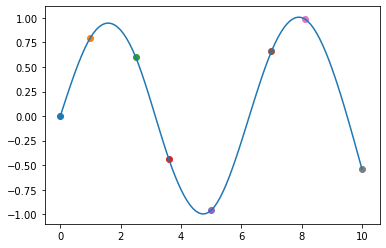

In [32]:
plt.scatter(input_data[0][0],input_data[0][1])
size = int((input_data[n-1][0] - input_data[0][0])/0.1) + n-1
inval = np.zeros(size)
outval = np.zeros(size)
j = 0
print(size)
for i in range(1,n):
    st = input_data[i-1][0]
    while st <= input_data[i][0]:
#        if(j>size): break
        val = calculate_function(a,h,input_data,st,i)
        inval[j] = st
        outval[j] = val
#        print(st)
        j += 1
#        if(j>size): break
#         print(st,val)
#        plt.plot(st,val)
        st =round(st + 0.1,2)
    plt.scatter(input_data[i][0],input_data[i][1])
plt.plot(inval,outval)
plt.show()


In [33]:
# 7
# -7.0 2.0
# -9.0 8.0
# 0.0 1.0
# 9.0 9.0
# 8.0 5.0
# 3.0 -3.0
# -3.0 -7.0